In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

In [3]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
feature_names = dataset.feature_names
feature_data = dataset.data
output_data = dataset.target

In [5]:
df = pd.DataFrame(data=feature_data,columns=feature_names)
df['Progress'] = output_data

In [6]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
X= df.drop('Progress',axis=1)
y= df['Progress']

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [9]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [10]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse =mean_squared_error(y_test,y_pred)

print("Accuracy :",score)
print("Mean absolute Error :",mae)
print("Mean Squared Error :",mse)

Accuracy : -0.04568414047923808
Mean absolute Error : 59.30075187969925
Mean Squared Error : 5644.924812030075


[Text(0.5941410306334372, 0.9722222222222222, 'x[2] <= 0.005\nsquared_error = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.3427927050882658, 0.9166666666666666, 'x[8] <= 0.014\nsquared_error = 3636.316\nsamples = 183\nvalue = 118.355'),
 Text(0.46846686786085145, 0.9444444444444444, 'True  '),
 Text(0.20775571131879544, 0.8611111111111112, 'x[5] <= 0.091\nsquared_error = 2641.993\nsamples = 138\nvalue = 102.855'),
 Text(0.16096832814122533, 0.8055555555555556, 'x[8] <= -0.043\nsquared_error = 2392.062\nsamples = 136\nvalue = 100.816'),
 Text(0.07736240913811007, 0.75, 'x[4] <= -0.039\nsquared_error = 1519.474\nsamples = 42\nvalue = 78.952'),
 Text(0.053374870197300105, 0.6944444444444444, 'x[4] <= -0.046\nsquared_error = 1850.165\nsamples = 24\nvalue = 94.792'),
 Text(0.036967808930425755, 0.6388888888888888, 'x[0] <= -0.0\nsquared_error = 1134.5\nsamples = 20\nvalue = 82.0'),
 Text(0.024091381100726894, 0.5833333333333334, 'x[6] <= 0.036\nsquared_error = 756.596\nsamples = 15\n

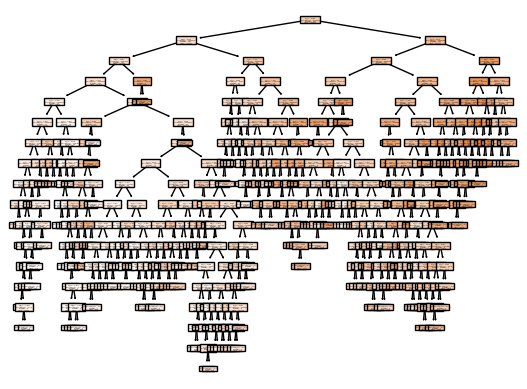

In [12]:
from sklearn import tree

plt.Figure(figsize=(60,40))
tree.plot_tree(regressor,filled=True)